In [1]:
import pandas as pd
df = pd.read_pickle('df_spain.pkl')

In [2]:
df

,Comunidades y Ciudades Autónomas,Provincias,Periodo,NumCompraVentas,TotalPoblación,PrecioVivienda
31,01 Andalucía,04 Almería,2022M01,1220.0,723899.0,11.800358
32,01 Andalucía,11 Cádiz,2022M01,1417.0,1259339.0,11.800358
33,01 Andalucía,14 Córdoba,2022M01,675.0,777414.0,11.800358
34,01 Andalucía,18 Granada,2022M01,1204.0,929968.0,11.800358
35,01 Andalucía,21 Huelva,2022M01,688.0,532865.0,11.800358
...,...,...,...,...,...,...
1638,19 Melilla,52 Melilla,2009M01,33.0,73361.0,11.816417
1639,19 Melilla,52 Melilla,2008M07,71.0,72213.0,11.801842
1640,19 Melilla,52 Melilla,2008M01,79.0,71244.0,11.818585
1641,19 Melilla,52 Melilla,2007M07,83.0,70080.0,11.792366


In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [4]:
print(df.dtypes)
print(df.shape)
df.head()

Comunidades y Ciudades Autónomas     object
Provincias                           object
Periodo                              object
NumCompraVentas                     float64
TotalPoblación                      float64
PrecioVivienda                      float64
dtype: object
(1612, 6)


,Comunidades y Ciudades Autónomas,Provincias,Periodo,NumCompraVentas,TotalPoblación,PrecioVivienda
31,01 Andalucía,04 Almería,2022M01,1220.0,723899.0,11.800358
32,01 Andalucía,11 Cádiz,2022M01,1417.0,1259339.0,11.800358
33,01 Andalucía,14 Córdoba,2022M01,675.0,777414.0,11.800358
34,01 Andalucía,18 Granada,2022M01,1204.0,929968.0,11.800358
35,01 Andalucía,21 Huelva,2022M01,688.0,532865.0,11.800358


In [5]:
# La codificación de etiquetas se utilizará para las columnas con 5 o menos valores únicos
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 10:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [6]:
# convertir el resto de la variable categórica en dummy
df = pd.get_dummies(df, drop_first=True)

In [7]:
print(df.dtypes)
print(df.shape)
df.head()

NumCompraVentas                                                float64
TotalPoblación                                                 float64
PrecioVivienda                                                 float64
Comunidades y Ciudades Autónomas_02 Aragón                       uint8
Comunidades y Ciudades Autónomas_03 Asturias, Principado de      uint8
                                                                ...   
Periodo_2020M01                                                  uint8
Periodo_2020M07                                                  uint8
Periodo_2021M01                                                  uint8
Periodo_2021M07                                                  uint8
Periodo_2022M01                                                  uint8
Length: 102, dtype: object
(1612, 102)


,NumCompraVentas,TotalPoblación,PrecioVivienda,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,Comunidades y Ciudades Autónomas_06 Cantabria,Comunidades y Ciudades Autónomas_07 Castilla y León,Comunidades y Ciudades Autónomas_08 Castilla - La Mancha,...,Periodo_2017M07,Periodo_2018M01,Periodo_2018M07,Periodo_2019M01,Periodo_2019M07,Periodo_2020M01,Periodo_2020M07,Periodo_2021M01,Periodo_2021M07,Periodo_2022M01
31,1220.0,723899.0,11.800358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32,1417.0,1259339.0,11.800358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33,675.0,777414.0,11.800358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,1204.0,929968.0,11.800358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,688.0,532865.0,11.800358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
### Feature Scaling
#El escalado de características utilizando MinMaxScaler esencialmente reduce el rango de tal manera que el rango está ahora entre 0 y n. Los algoritmos de aprendizaje automático funcionan mejor cuando las variables numéricas de entrada caen dentro de una escala similar. En este caso, estamos escalando entre 0 y 5.

In [9]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_col = list(df.columns)
df_col.remove('PrecioVivienda')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['PrecioVivienda'] = pd.to_numeric(df['PrecioVivienda'], downcast='float')
df.head()

,NumCompraVentas,TotalPoblación,PrecioVivienda,Comunidades y Ciudades Autónomas_02 Aragón,"Comunidades y Ciudades Autónomas_03 Asturias, Principado de","Comunidades y Ciudades Autónomas_04 Balears, Illes",Comunidades y Ciudades Autónomas_05 Canarias,Comunidades y Ciudades Autónomas_06 Cantabria,Comunidades y Ciudades Autónomas_07 Castilla y León,Comunidades y Ciudades Autónomas_08 Castilla - La Mancha,...,Periodo_2017M07,Periodo_2018M01,Periodo_2018M07,Periodo_2019M01,Periodo_2019M07,Periodo_2020M01,Periodo_2020M07,Periodo_2021M01,Periodo_2021M07,Periodo_2022M01
31,0.698900,0.488744,11.800358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
32,0.811755,0.888317,11.800358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
33,0.386687,0.528680,11.800358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
34,0.689734,0.642523,11.800358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
35,0.394134,0.346184,11.800358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [10]:
print(df.dtypes)
print('Size of Full Encoded Dataset: {}'. format(df.shape))

NumCompraVentas                                                float64
TotalPoblación                                                 float64
PrecioVivienda                                                 float32
Comunidades y Ciudades Autónomas_02 Aragón                     float64
Comunidades y Ciudades Autónomas_03 Asturias, Principado de    float64
                                                                ...   
Periodo_2020M01                                                float64
Periodo_2020M07                                                float64
Periodo_2021M01                                                float64
Periodo_2021M07                                                float64
Periodo_2022M01                                                float64
Length: 102, dtype: object
Size of Full Encoded Dataset: (1612, 102)


In [11]:
### Splitting data into training and testing sets

In [12]:
#Antes de implementar o aplicar cualquier algoritmo de aprendizaje automático, debemos desacoplar los conjuntos de datos de entrenamiento y de prueba de nuestro marco de datos principal.

In [13]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df['PrecioVivienda'].copy()

In [14]:
type(target)

pandas.core.series.Series

In [15]:
# let's remove the target feature and redundant features from the dataset
df.drop(['PrecioVivienda'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1612, 101)


In [16]:
from sklearn.model_selection import train_test_split
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1209, 101)
Number transactions y_train dataset:  (1209,)
Number transactions X_test dataset:  (403, 101)
Number transactions y_test dataset:  (403,)


In [17]:
# XGBoost regressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)


[18:14:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=42, reg_alpha=0, ...)

In [18]:
#Prediction of model
y_pred_xgb = xgb_model.predict(X_test)

In [19]:
#MODEL EVALUATION

In [20]:
from sklearn import metrics
MAE_xgb= metrics.mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb= metrics.mean_squared_error(y_test, y_pred_xgb)
import numpy as np
RMSE_xgb= np.sqrt(MSE_xgb)
print (MAE_xgb, MSE_xgb, RMSE_xgb)

0.028959684 0.0019375305 0.04401739


In [21]:

R_squared_value = xgb_model.score(X_test, y_test)

print(R_squared_value)

0.9135271209014462


In [22]:
import shap
shap.initjs()

In [23]:
# Fits the explainer
explainer = shap.Explainer(xgb_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)


Permutation explainer: 404it [00:10,  2.70it/s]                         


# Interpretacion LOCAL

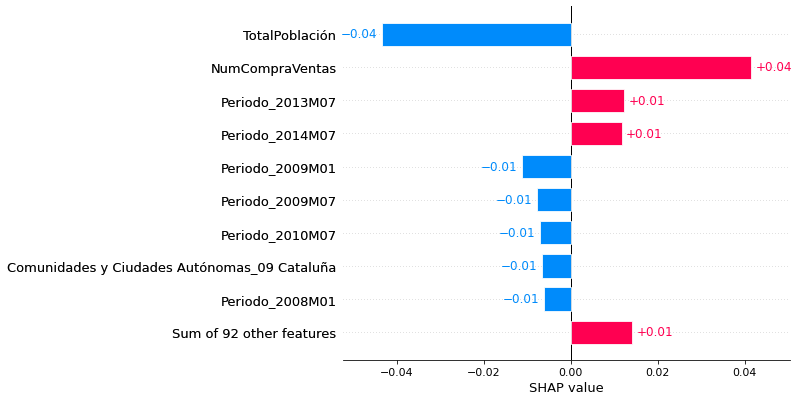

In [24]:
shap.plots.bar(shap_values[7])


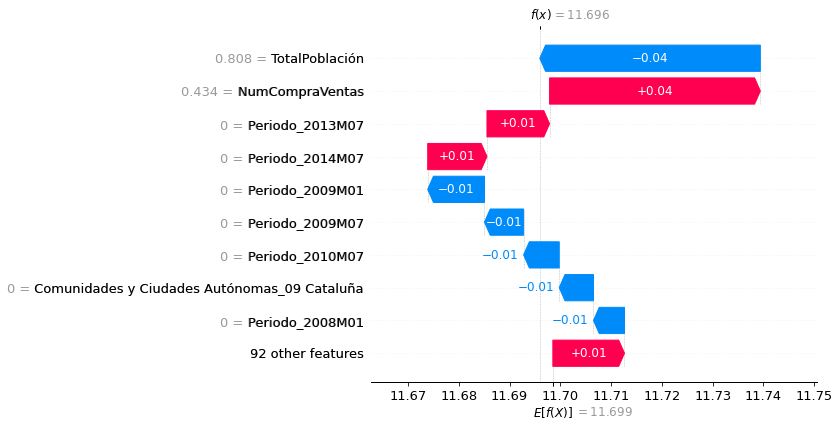

In [25]:
#VALORES PARA UNA SOLA OBSERVACIÓN, varía mucho de unas a otras
shap.plots.waterfall(shap_values[7])

In [26]:
shap.plots.force(shap_values[7])

# Interpretación GLOBAL

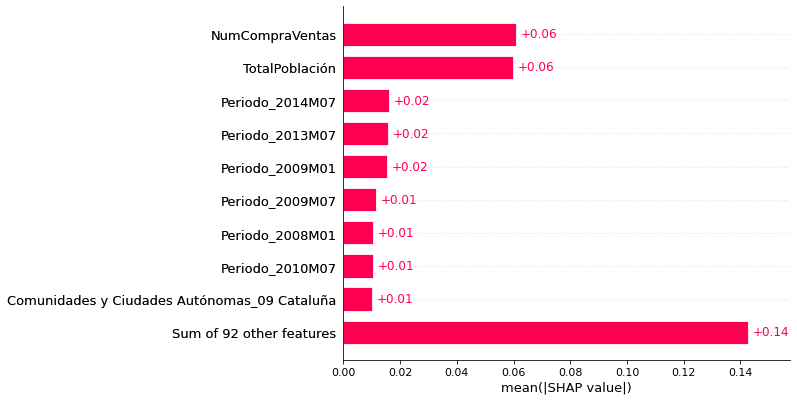

In [27]:
shap.plots.bar(shap_values)

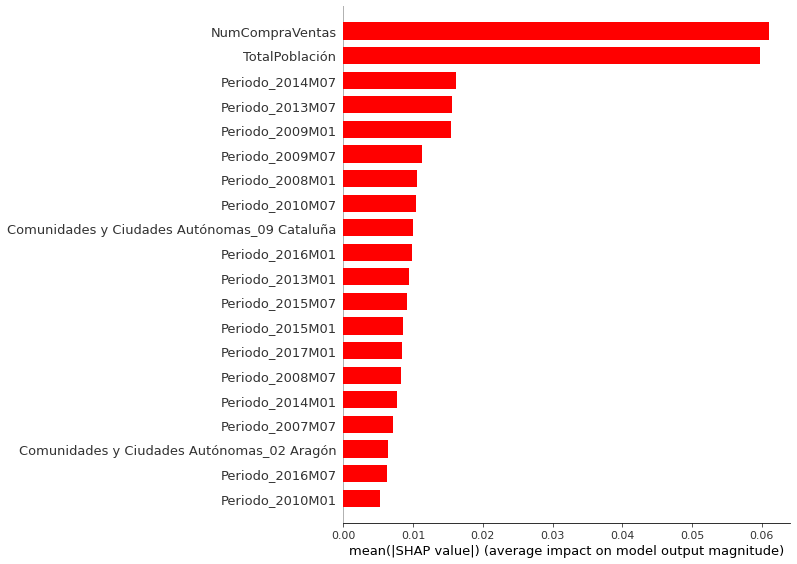

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

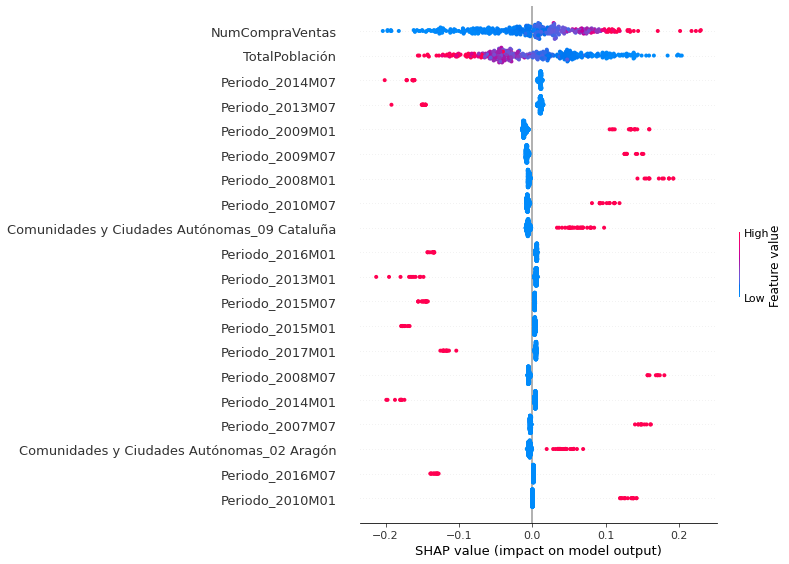

In [29]:
shap.summary_plot(shap_values, X_test)

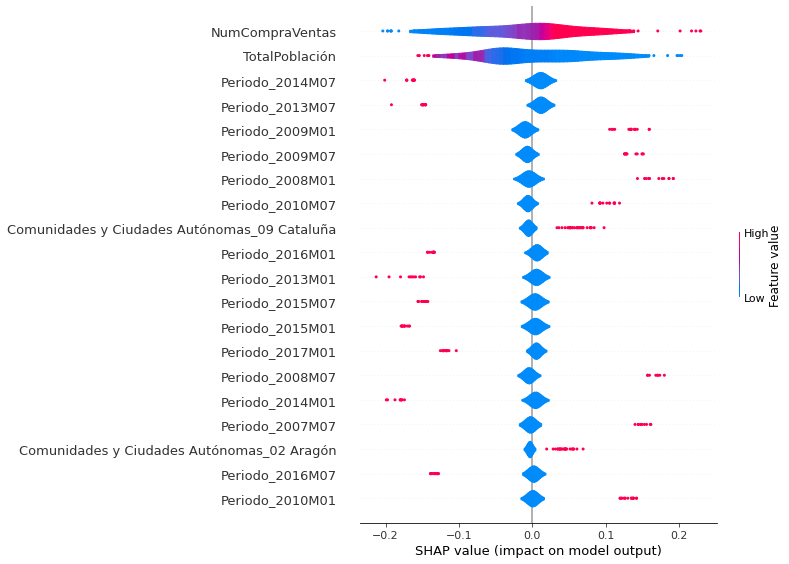

In [30]:
shap.summary_plot(shap_values, plot_type='violin')